# Prosper Loan Data Exploration
## by Sylvia Ngari

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prelim">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>    
<li><a href="#bi">Bivariate Exploration</a></li>    
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset used for this project is from the peer-to-peer lending company [Prosper](https://www.prosper.com)  
The dataset is available in `csv` format while the variable definitions are in a `Google Sheet`
+ [Prosper Dataset](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)
+ [Variable Definitions](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit)  

<a id='prelim'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set base color
color = sns.color_palette()[0]

%matplotlib inline

In [2]:
# load the dataset
prosperloan = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')
prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [3]:
# view a sample of the data
prosperloan.sample(6)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
44454,6B443599920608723496D4F,1119902,2014-01-08 14:41:16.363000000,NaN,60,Current,NaN,0.24856,0.2235,0.2135,...,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57394,09193600297161980ABC1D3,1174724,2014-02-01 11:50:57.357000000,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
84785,EE633429610127949B602DA,385017,2008-08-19 09:25:39.343000000,A,36,Completed,2011-03-10 00:00:00,0.13865,0.1245,0.1145,...,-154.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,407
8230,9E3D3596327187261A0B119,1048533,2013-11-25 10:11:43.557000000,NaN,36,Current,NaN,0.28595,0.2474,0.2374,...,-19.56,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
57202,C69133990298536262D22B0,194389,2007-08-29 02:38:01.627000000,B,36,Completed,2008-11-24 00:00:00,0.10692,0.1000,0.0900,...,-17.76,0.0,0.0,0.0,0.0,1.0,0,0,0.0,4
31597,30C435283263891394AA988,533591,2011-10-17 22:38:20.097000000,NaN,36,Current,NaN,0.13220,0.1110,0.1010,...,-76.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,54


### Issues of interest

When it comes to funding loans, losing the initial investment is always a risk.  
What factors can help us determine whether a lendee will fulfill their end of the deal?   
We'll try to look into some of those aspects for Prosper lendees.

We look through some of the variables that piqued my interest and see what values they have and their numeric summaries

In [4]:
# Income
prosperloan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [5]:
# loan term in months
prosperloan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [6]:
# status of the loan
prosperloan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [7]:
# loan amounts
prosperloan.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [8]:
# Net principal losses on loans
prosperloan.LP_NetPrincipalLoss.describe()

count    113937.000000
mean        681.420499
std        2357.167068
min        -954.550000
25%           0.000000
50%           0.000000
75%           0.000000
max       25000.000000
Name: LP_NetPrincipalLoss, dtype: float64

In [9]:
# Total amount of past delinquencies
prosperloan.AmountDelinquent.describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [10]:
# home ownership status
prosperloan.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [11]:
# group membership
prosperloan.CurrentlyInGroup.value_counts()

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

Too few of the loan clients are in groups, so we'll ignore this variable in further explortions

### Structure of the dataset

113,937 rows by 81 columns

### Main features of interest

**Loan Status**
 - Charged off loans
 - Completed loans
 
**Delinquency history**
- Delinquent
- Not Delinquent

We'll look at loan data for loans that have already been closed. We'll try to see whether there is any pattern that determines whether a loan becomes chargedoff or is fully paid off.

### Other features of interest 

+ Loan Term           
+ Amount Delinquent
+ Income Range
+ Home Ownership
+ Loan Original Amounts
+ Net Principal Loss
+ Loan Origination Date
+ Loan Closing Date

### Dataset Preparation

The initial dataset has too much information, so we'll narrow it down to the areas of interest.

**Steps**

+ Create a copy of the original set
+ Select only the columns of interest using `iloc`
+ Query only `Chargedoff` and `Completed` loan statuses

In [12]:
prosperloan_clean = prosperloan.copy()
prosperloan_clean = prosperloan_clean.iloc[:, [4,5,6,21,36,47,63,64,74]
                                          ].query("('Chargedoff', 'Completed') in LoanStatus"
                                                 ).reset_index(drop=True)
prosperloan_clean.sample(6)

,Term,LoanStatus,ClosedDate,IsBorrowerHomeowner,AmountDelinquent,IncomeRange,LoanOriginalAmount,LoanOriginationDate,LP_NetPrincipalLoss
49059,36,Chargedoff,2009-06-14 00:00:00,False,40.0,"$50,000-74,999",2000,2007-11-13 00:00:00,1290.00
37200,36,Completed,2012-09-19 00:00:00,False,0.0,"$1-24,999",2000,2011-06-07 00:00:00,0.00
23294,36,Completed,2011-04-07 00:00:00,False,0.0,"$25,000-49,999",4000,2008-04-07 00:00:00,0.00
40840,36,Chargedoff,2013-02-26 00:00:00,False,1447.0,"$25,000-49,999",4000,2012-02-27 00:00:00,3472.49
33118,36,Completed,2010-12-28 00:00:00,True,0.0,"$1-24,999",6000,2007-12-28 00:00:00,0.00
16584,36,Completed,2011-02-14 00:00:00,False,0.0,"$25,000-49,999",1500,2008-06-23 00:00:00,0.00


In [13]:
prosperloan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50066 entries, 0 to 50065
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Term                 50066 non-null  int64  
 1   LoanStatus           50066 non-null  object 
 2   ClosedDate           50066 non-null  object 
 3   IsBorrowerHomeowner  50066 non-null  bool   
 4   AmountDelinquent     44175 non-null  float64
 5   IncomeRange          50066 non-null  object 
 6   LoanOriginalAmount   50066 non-null  int64  
 7   LoanOriginationDate  50066 non-null  object 
 8   LP_NetPrincipalLoss  50066 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 2.3+ MB


### Cleaning

When assessing the dataset, we'd seen some issues we'd like to amend before proceeding to make any plots

#### Create new columns
+ `Delinquent Status` will tell whether clients have had any delinquencies
+ `Loan Range` will group loans based on amounts. Somewhat similar to `IncomeRange`

#### Rename some variables
##### `Term`
+ Change all terms to **year format** eg 12 --> 1 Year

##### `IncomeRange`
+ Change `Not displayed` to `Unavailable`


#### Change Datatypes
+ `ClosedDate` & `LoanOriginationDate` --> `datetime`
+ `LoanStatus`, `Term`, & `IncomeRange` --> `category`


In [14]:
prosperloan_clean.IncomeRange.replace('Not displayed', 'Unavailable', inplace=True)
prosperloan_clean.IncomeRange.unique()

array(['$25,000-49,999', 'Unavailable', '$1-24,999', '$75,000-99,999',
       '$100,000+', '$50,000-74,999', 'Not employed', '$0'], dtype=object)

In [15]:
prosperloan_clean.Term.replace([12,36,60], ['1 Year', '3 Years', '5 Years'], inplace=True)
prosperloan_clean.Term.unique()

array(['3 Years', '5 Years', '1 Year'], dtype=object)

In [16]:
# nulls will be grouped as unavailable data
prosperloan_clean['DelinquentStatus'] = np.select([(prosperloan_clean.AmountDelinquent.isna()),
                                                   (prosperloan_clean.AmountDelinquent == 0),
                                                   (prosperloan_clean.AmountDelinquent > 0)],
                                                   ['Unavailable', 'Not Delinquent', 'Delinquent'])
prosperloan_clean.DelinquentStatus.unique()

array(['Delinquent', 'Unavailable', 'Not Delinquent'], dtype=object)

In [17]:
# create loan ranges
prosperloan_clean['LoanRange'] = pd.cut(prosperloan_clean.LoanOriginalAmount, 
                                        [1000,5000,10000,15000,20000,25000,30000,36000], 
                                        labels=['$1,000-4,999', '$5,000-9,999', '$10,000-14,999', '$15,000-19,999',
                                                '$20,000-24,999', '$25,000-29,999', '$30,000-35,000'], 
                                        include_lowest=True, right=False)
prosperloan_clean.loc[:, ['LoanOriginalAmount', 'LoanRange']].sample(10)

,LoanOriginalAmount,LoanRange
27272,8000,"$5,000-9,999"
47294,4000,"$1,000-4,999"
4406,3000,"$1,000-4,999"
49206,15000,"$15,000-19,999"
39098,3000,"$1,000-4,999"
35738,2000,"$1,000-4,999"
33621,4500,"$1,000-4,999"
9603,1000,"$1,000-4,999"
45836,25000,"$25,000-29,999"
29143,20000,"$20,000-24,999"


In [18]:
# change datatypes
from pandas.api.types import CategoricalDtype

term_type = CategoricalDtype(categories=['1 Year', '3 Years', '5 Years'], ordered=True)
loan_status_type = CategoricalDtype(categories=['Chargedoff', 'Completed'], ordered=True)
delq_type = CategoricalDtype(['Delinquent', 'Not Delinquent', 'Unavailable'], ordered=True)
income_type = CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                           '$75,000-99,999', '$100,000+', 'Not employed', 'Unavailable'], 
                               ordered=True)

prosperloan_clean = prosperloan_clean.astype({'Term': term_type, 'LoanStatus': loan_status_type,
                                              'DelinquentStatus': delq_type,
                                              'IncomeRange': income_type,
                                              'LoanOriginationDate': 'datetime64',
                                              'ClosedDate': 'datetime64'})
prosperloan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50066 entries, 0 to 50065
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Term                 50066 non-null  category      
 1   LoanStatus           50066 non-null  category      
 2   ClosedDate           50066 non-null  datetime64[ns]
 3   IsBorrowerHomeowner  50066 non-null  bool          
 4   AmountDelinquent     44175 non-null  float64       
 5   IncomeRange          50066 non-null  category      
 6   LoanOriginalAmount   50066 non-null  int64         
 7   LoanOriginationDate  50066 non-null  datetime64[ns]
 8   LP_NetPrincipalLoss  50066 non-null  float64       
 9   DelinquentStatus     50066 non-null  category      
 10  LoanRange            50066 non-null  category      
dtypes: bool(1), category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 2.2 MB


Our clean data has 50,066 rows and 10 columns.

In [19]:
# save our modified dataset
prosperloan_clean.to_csv('prosper_clean.csv', index=False)

<a id='uni'></a>
## Univariate Exploration

#### Function  Definitions
Before getting into the plots, we'll define a function that will help annotate our plots.

In [20]:
 def plot_label(percent=False):
    '''
    Label bars in bar plot
    
    Parameters:
    -----------
    percent : bool
        Indicates whether labels are percentages
        
    Returns
    -------
    Text        
    '''
    if percent:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%')   
    else:
        for container in ax.containers:
            ax.bar_label(container)

# set plot style and font sizes
sns.set(style='white')
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=13)

### How are loans spread across the Terms?

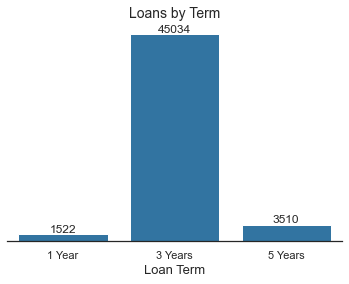

In [21]:
ax = sns.countplot(x='Term', color=color, data=prosperloan_clean);
plot_label(); sns.despine(left=True)
ax.set(yticklabels='', ylabel='', xlabel='Loan Term', title='Loans by Term');

We see that the 3-year term is most common.

### How is Loan Status distributed?

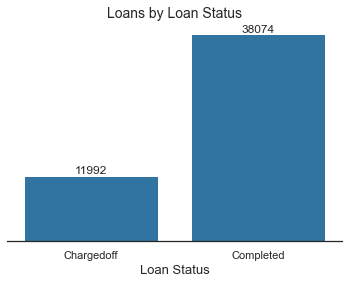

In [22]:
ax = sns.countplot(x='LoanStatus', color=color, data=prosperloan_clean);
plot_label(); sns.despine(left=True)
ax.set(yticklabels='', ylabel='', xlabel='Loan Status', title='Loans by Loan Status');

Completed loans make up majority of the loans

### How is Delinquency Status distributed?

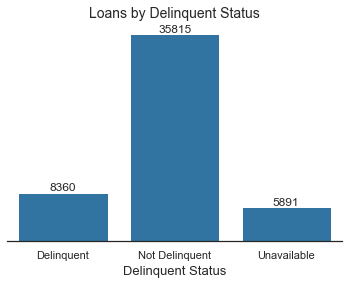

In [23]:
ax = sns.countplot(x='DelinquentStatus', color=color, data=prosperloan_clean);
plot_label(); sns.despine(left=True)
ax.set(yticklabels='', ylabel='', xlabel='Delinquent Status', title='Loans by Delinquent Status');

Most of the lendees have no prior delinquencies

### How are incomes spread?

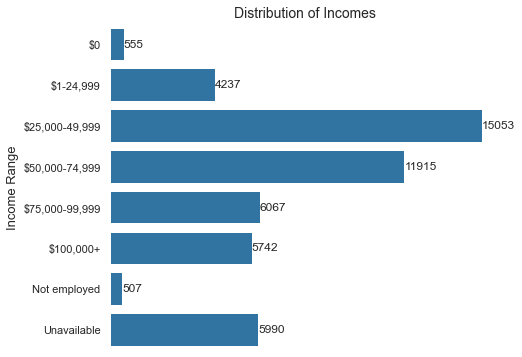

In [24]:
plt.figure(figsize=(7,6))
ax = sns.countplot(y='IncomeRange', color=color, data=prosperloan_clean);
plot_label(); sns.despine(left=True, bottom=True)
ax.set(xticklabels='', xlabel='', ylabel='Income Range', title='Distribution of Incomes');

The most common income range is **\\$25,000-49,999** closely followed by \\$50000-74999. 

The least common are the Unemployed and \\$0 

### How is home-ownership spread across the lendees?

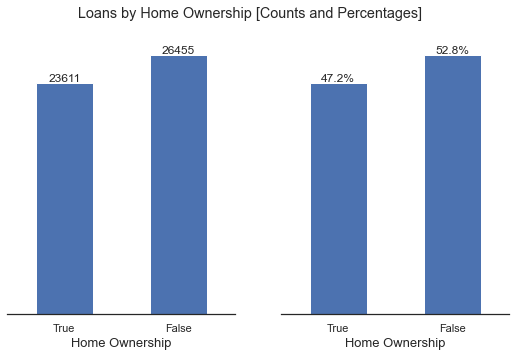

In [25]:
f, axes = plt.subplots(1,2, figsize=(9,5))
f.suptitle('Loans by Home Ownership [Counts and Percentages]')

ax = prosperloan_clean.IsBorrowerHomeowner.value_counts(ascending=True).plot(kind='bar', rot=0, ax=axes[0]);
plot_label(); 
ax.set(yticklabels='', ylabel='', xlabel='Home Ownership');

#normalize the counts and multiply by 100 to get percentages
ax = prosperloan_clean.IsBorrowerHomeowner.value_counts(ascending=True, normalize=True
                                                       ).mul(100).plot(kind='bar', rot=0, ax=axes[1]);
plot_label(percent=True); sns.despine(left=True)
ax.set(yticklabels='', ylabel='', xlabel='Home Ownership');

Home owners are fewer but it's a relatively small gap.

### How are delinquency amounts spread?

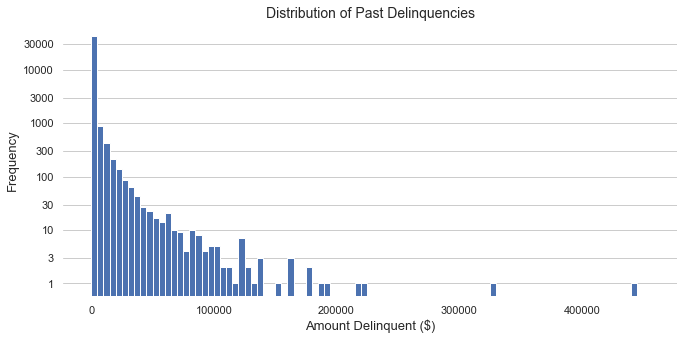

In [26]:
ax=prosperloan_clean.AmountDelinquent.hist(bins=np.arange(0,460000,5000), figsize=(11,5))
ax.set_yscale('log')
yticks=[1,3,10,30,100,300,1000,3000,10000,30000]
ax.set(yticks=yticks, yticklabels=yticks, ylabel='Frequency', xlabel='Amount Delinquent ($)', 
       title='Distribution of Past Delinquencies');
ax.grid(axis='x')
sns.despine(left=True, bottom=True)

+ Majority of the lendees have delinquencies between \\$0-5000.  
+ We needed to use a log-scale transformation on the y-axis to be able to view all data points  
+ A few points towards the far right are of interest and I'd like to take a closer look
+ There is a drastic decrease in the number of loans as loan amounts increase

In [27]:
#look at delinquencies equal to or greater than 200k
prosperloan_clean.query('AmountDelinquent >= 200000')

,Term,LoanStatus,ClosedDate,IsBorrowerHomeowner,AmountDelinquent,IncomeRange,LoanOriginalAmount,LoanOriginationDate,LP_NetPrincipalLoss,DelinquentStatus,LoanRange
7583,5 Years,Completed,2013-10-24,True,327677.0,"$100,000+",4000,2013-09-03,0.00,Delinquent,"$1,000-4,999"
22913,3 Years,Chargedoff,2008-04-22,False,444745.0,"$25,000-49,999",4000,2007-04-23,3567.08,Delinquent,"$1,000-4,999"
24104,1 Year,Completed,2013-04-03,True,223738.0,"$75,000-99,999",4000,2012-04-03,0.00,Delinquent,"$1,000-4,999"
35724,3 Years,Chargedoff,2012-06-30,False,215315.0,"$25,000-49,999",8500,2011-11-30,8486.53,Delinquent,"$5,000-9,999"


#### Interesting Insights
+ Home-owners paid off their Prosper loans while the non-home owners didn't.  
+ Home-owners had much higher incomes than the non-home owners.  
+ Those who didn't pay back the loans paid back very little of the principal

**A curious thought**: if age details were available, it would provide useful insight. It would be intersting to know the age-brackets of these clients. 

### How are the Prosper Loan amounts distributed?

In [28]:
prosperloan_clean.LoanOriginalAmount.describe()

count    50066.000000
mean      6239.350957
std       5150.099434
min       1000.000000
25%       2700.000000
50%       4500.000000
75%       8000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

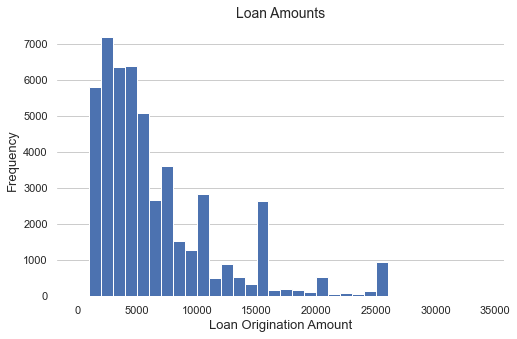

In [29]:
plt.figure(figsize=(8,5))
ax = prosperloan_clean.LoanOriginalAmount.hist(bins=np.arange(0,35000,1000));
sns.despine(left=True, bottom=True)
ax.set(ylabel='Frequency', xlabel='Loan Origination Amount', title='Loan Amounts');
ax.grid(axis='x')

+ Most loans are within the \\$1000-5000 range 
+ Loan distribution is right skewed with some peaks at around the \\$10k and \\$15k loan amounts

The lowest loan amount is \\$1,000 

### How are the Net losses spread?

In [30]:
prosperloan_clean.LP_NetPrincipalLoss.describe()

count    50066.000000
mean      1103.797580
std       2872.949611
min        -69.190000
25%          0.000000
50%          0.000000
75%          0.000000
max      25000.000000
Name: LP_NetPrincipalLoss, dtype: float64

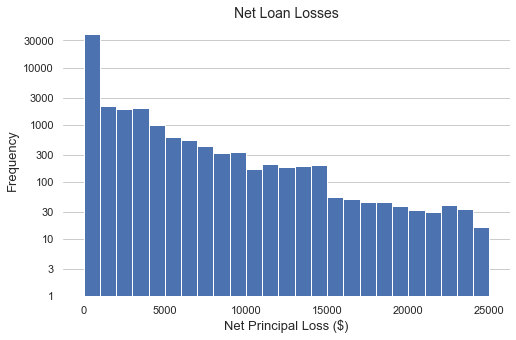

In [31]:
plt.figure(figsize=(8,5))
ax = prosperloan_clean.LP_NetPrincipalLoss.hist(bins=np.arange(0,26000,1000));
sns.despine(left=True, bottom=True)
ax.set(yscale='log', ylabel='Frequency', xlabel='Net Principal Loss ($)', title='Net Loan Losses');
ax.set(yticks=yticks, yticklabels=yticks)
ax.grid(axis='x')

There is a steady decrease in number of loan losses as the loan amount increases.

Once again we use a log transform on the yscale to easily visualize all the data points.

<a id='bi'></a>
## Bivariate Exploration

We'll do abit of cross-tabulation to enable us get the values we need for plotting. 

Normalization will be done as well to get percentages

### How does Loan Term relate to Loan Status? 

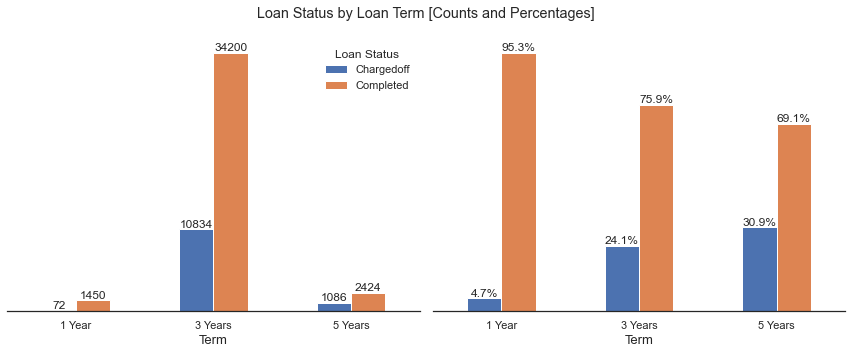

In [32]:
f,axes = plt.subplots(1,2, figsize=(12,5))
f.suptitle('Loan Status by Loan Term [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.Term, prosperloan_clean.LoanStatus).plot(kind='bar', ax=axes[0], rot=0)
ax.set(ylabel='', yticklabels='', xlabel='Term')
plot_label()
ax.legend(title='Loan Status', loc='best', frameon=False)

# percentages
ax = pd.crosstab(prosperloan_clean.Term, prosperloan_clean.LoanStatus, normalize='index'
                ).mul(100).plot(kind='bar', ax=axes[1], legend=None, rot=0)
ax.set(ylabel='', yticklabels='', xlabel='Term')
sns.despine(left=True); plot_label(percent=True)    
plt.tight_layout()

- The percentage of chargedoff loans increases as the terms increase. 
- One-year loans have the highest completion rate.

### How does Home Ownership relate to Delinquent Status? 

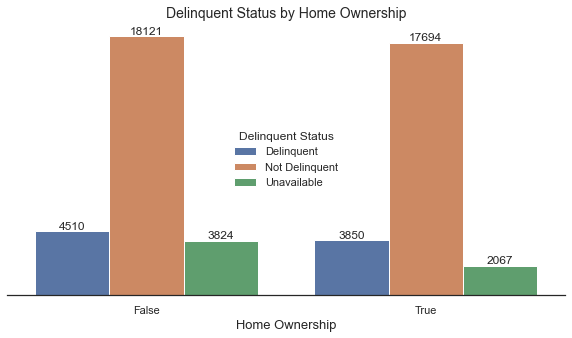

In [33]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='IsBorrowerHomeowner', hue='DelinquentStatus', data=prosperloan_clean)
ax.set(ylabel='', yticklabels='', xlabel='Home Ownership', title='Delinquent Status by Home Ownership')
plot_label()
sns.despine(left=True);
ax.legend(title='Delinquent Status', loc='center',  frameon=False);

The rates of delinquency are almost evenly spread for both homeowners and non-homeowners

### How does Home Ownership relate to Loan Status? 

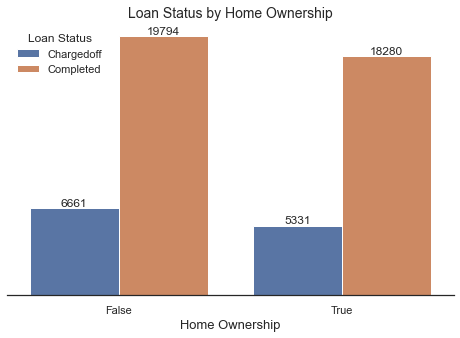

In [34]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='IsBorrowerHomeowner', hue='LoanStatus', data=prosperloan_clean)
ax.set(ylabel='', yticklabels='', xlabel='Home Ownership', title='Loan Status by Home Ownership')
plot_label()
sns.despine(left=True);
ax.legend(title='Loan Status',  frameon=False);

As with delinquent status, loan statuses seem unaffected by home ownership. The numbers are almost similar for chargedoff and completed loans

### How does Loan Status relate to Delinquent Status? 

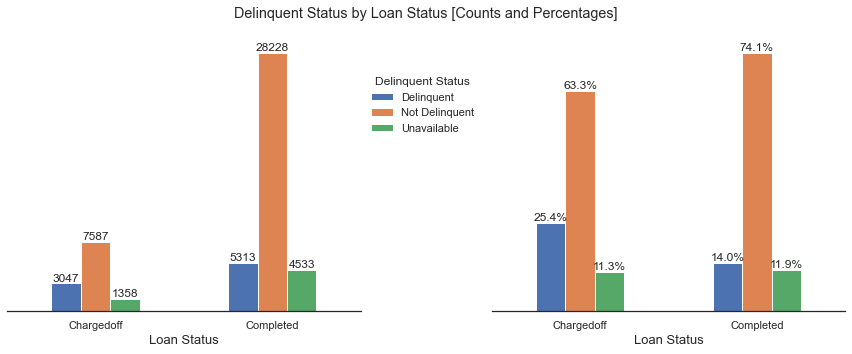

In [35]:
f,axes = plt.subplots(1,2, figsize=(12,5))
f.suptitle('Delinquent Status by Loan Status [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.LoanStatus, prosperloan_clean.DelinquentStatus).plot(kind='bar', rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='Loan Status')
plot_label()
ax.legend(title='Delinquent Status', loc='upper left', bbox_to_anchor=(1,0.9), frameon=False)

# get percentages
ax = pd.crosstab(prosperloan_clean.LoanStatus, prosperloan_clean.DelinquentStatus, normalize='index'
                ).mul(100).plot(kind='bar', rot=0, ax=axes[1], legend=None)
ax.set(ylabel='', yticklabels='', xlabel='Loan Status')
sns.despine(left=True); plot_label(percent=True)

plt.tight_layout()

- It is particularly surprising that 63% of those with charged-off loans had no prior delinquencies
- 14% of lendees who completed their loans had previous delinquencies.

### How does Delinquent Status relate to Loan Status? 

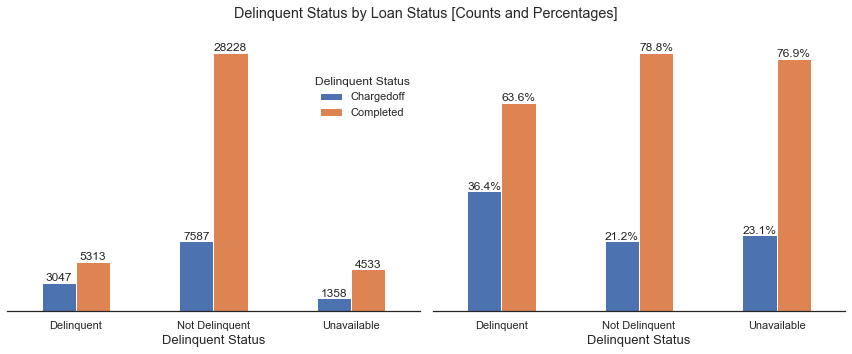

In [36]:
f,axes = plt.subplots(1,2, figsize=(12,5))
f.suptitle('Delinquent Status by Loan Status [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.DelinquentStatus, prosperloan_clean.LoanStatus
                ).plot(kind='bar', rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='Delinquent Status')
plot_label()
ax.legend(title='Delinquent Status', loc='upper right', bbox_to_anchor=(1,0.9), frameon=False)

# get percentages
ax = pd.crosstab(prosperloan_clean.DelinquentStatus, prosperloan_clean.LoanStatus, 
                 normalize='index').mul(100).plot(kind='bar', rot=0, ax=axes[1], legend=None)
ax.set(ylabel='', yticklabels='', xlabel='Delinquent Status' )
sns.despine(left=True); plot_label(percent=True)
plt.tight_layout()

+ About 64% of those with delinquencies did pay off their Prosper loans.  
  This does show a lot of goodwill and makes a case for provision of loans to those with delinquencies.
+ 21% of persons without prior delinquencies didn't pay off the Prosper loans. 

### How does Income Range relate to Loan Status? 

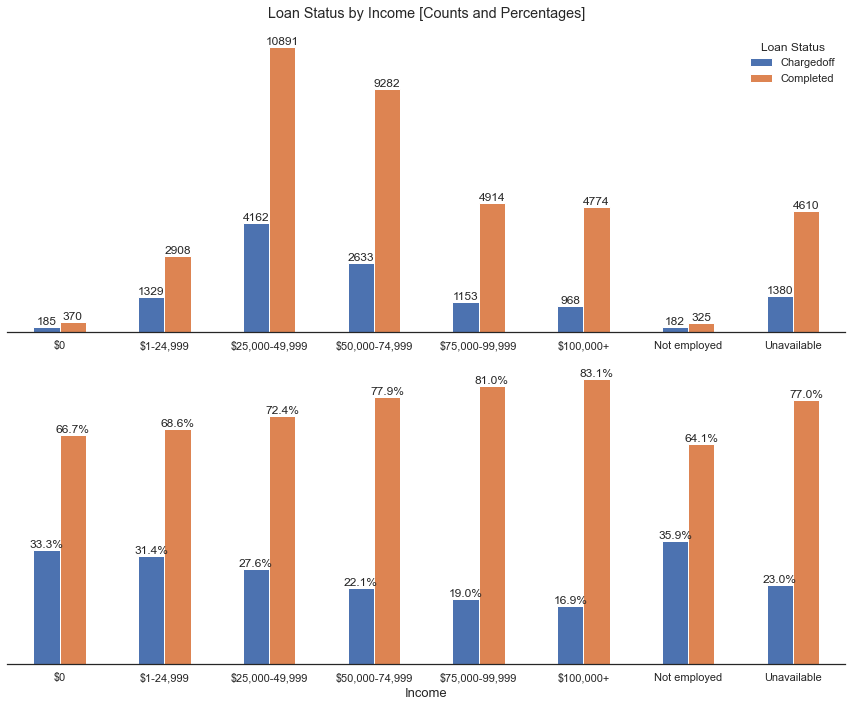

In [37]:
f, axes = plt.subplots(2,1, figsize=(12,10))
f.suptitle('Loan Status by Income [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.IncomeRange, prosperloan_clean.LoanStatus).plot(kind='bar',  rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='')
plot_label()
ax.legend(title='Loan Status', frameon=False);

# get percentages
ax = pd.crosstab(prosperloan_clean.IncomeRange, prosperloan_clean.LoanStatus, normalize='index'
                ).mul(100).plot(kind='bar', ax=axes[1], rot=0, legend=None)
ax.set(xlabel='Income', ylabel='', yticklabels='')
sns.despine(left=True); plot_label(percent=True)

plt.tight_layout()

* Most of the lendees are in the \\$25k-49.9k income group 
* Second highest group is \\$50k-74.9k
* The loan completion rate increases as incomes increase.   
  The reverse is true for the rate of chargedoff loans
* It's interesting to note that the unemployed and those with \\$0 income have a completion rate of 64% and 66% respectively

### How does Income Range relate to Delinquent Status? 

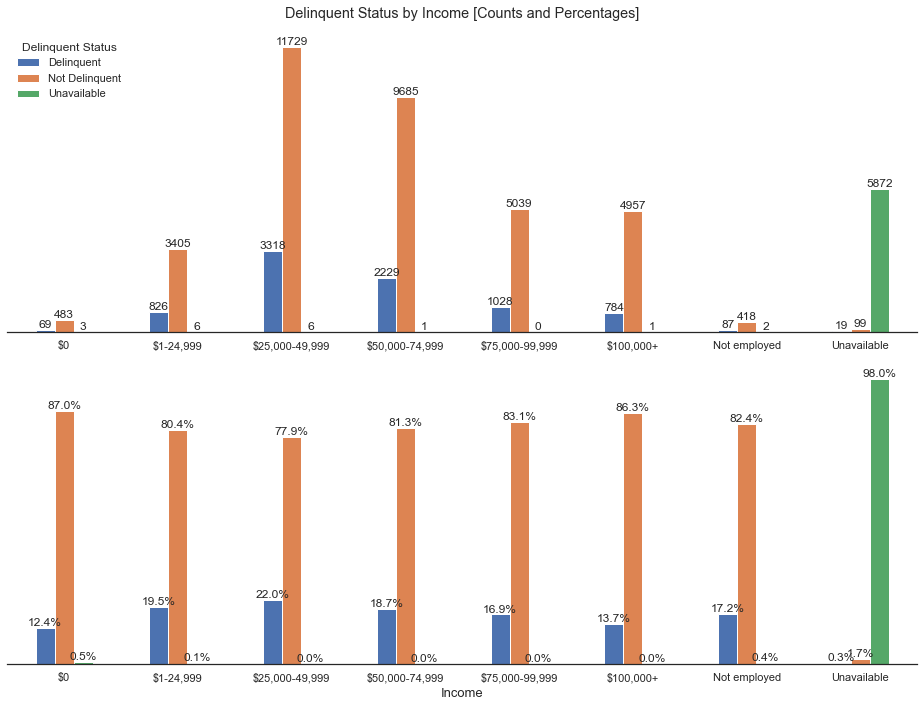

In [38]:
f, axes = plt.subplots(2,1, figsize=(13,10))
f.suptitle('Delinquent Status by Income [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.IncomeRange, prosperloan_clean.DelinquentStatus).plot(kind='bar', rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='')
plot_label()
ax.legend(title='Delinquent Status', loc='upper left', frameon=False);

# get percentages
ax = pd.crosstab(prosperloan_clean.IncomeRange, prosperloan_clean.DelinquentStatus, normalize='index'
                ).mul(100).plot(kind='bar', rot=0, ax=axes[1], legend=None)
ax.set(ylabel='', yticklabels='', xlabel='Income')
sns.despine(left=True); plot_label(percent=True)

plt.tight_layout()

+ The highest rate of prior delinquencies is in the \\$25k-49.9k income group followed by the \\$1-24.9k range

### How does Loan Status vary across Loan Range ?

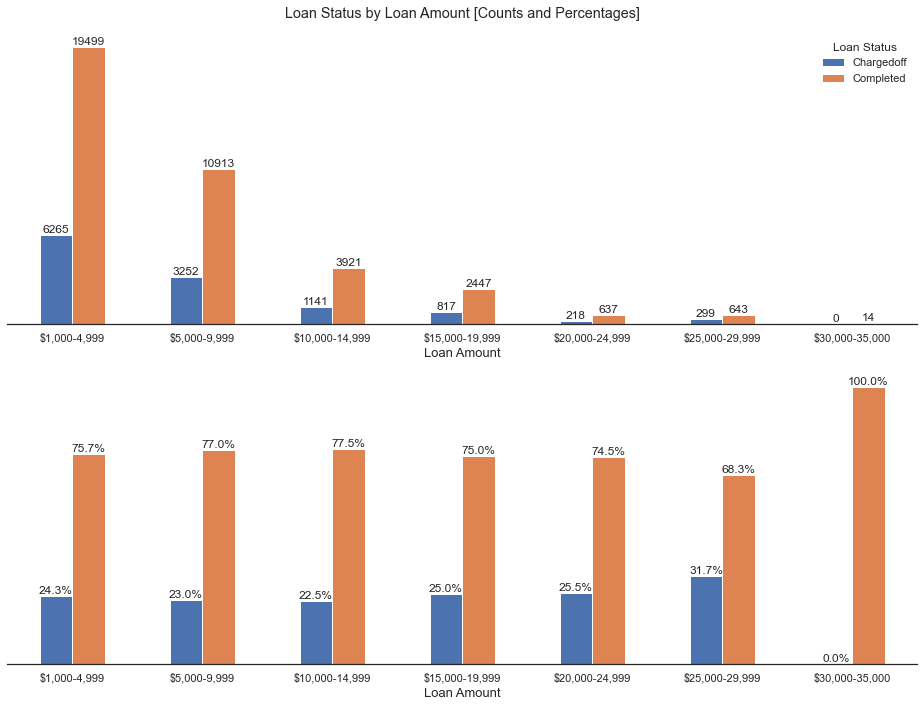

In [39]:
f, axes = plt.subplots(2,1, figsize=(13,10))
f.suptitle('Loan Status by Loan Amount [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.LoanRange, prosperloan_clean.LoanStatus).plot(kind='bar', rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='Loan Amount')
plot_label()
ax.legend(title='Loan Status', frameon=False);

# get percentages
ax = pd.crosstab(prosperloan_clean.LoanRange, prosperloan_clean.LoanStatus, normalize='index'
                ).mul(100).plot(kind='bar', ax=axes[1], rot=0, legend=None)
ax.set(xlabel='Loan Amount', ylabel='', yticklabels='')
sns.despine(left=True); plot_label(percent=True)

plt.tight_layout()

+ The most common loan amount is \\$1000-4999 followed by \\$5k-9.9k
+ All loans in the $30k-35k range were fully repaid
+ \\$10k-14.9k loans had the second highest rate of completion at 77.5% 
+ \\$25k-29.9k loans had the lowest rate of completion at 68.3%


### How do Loan amounts relate to income level?

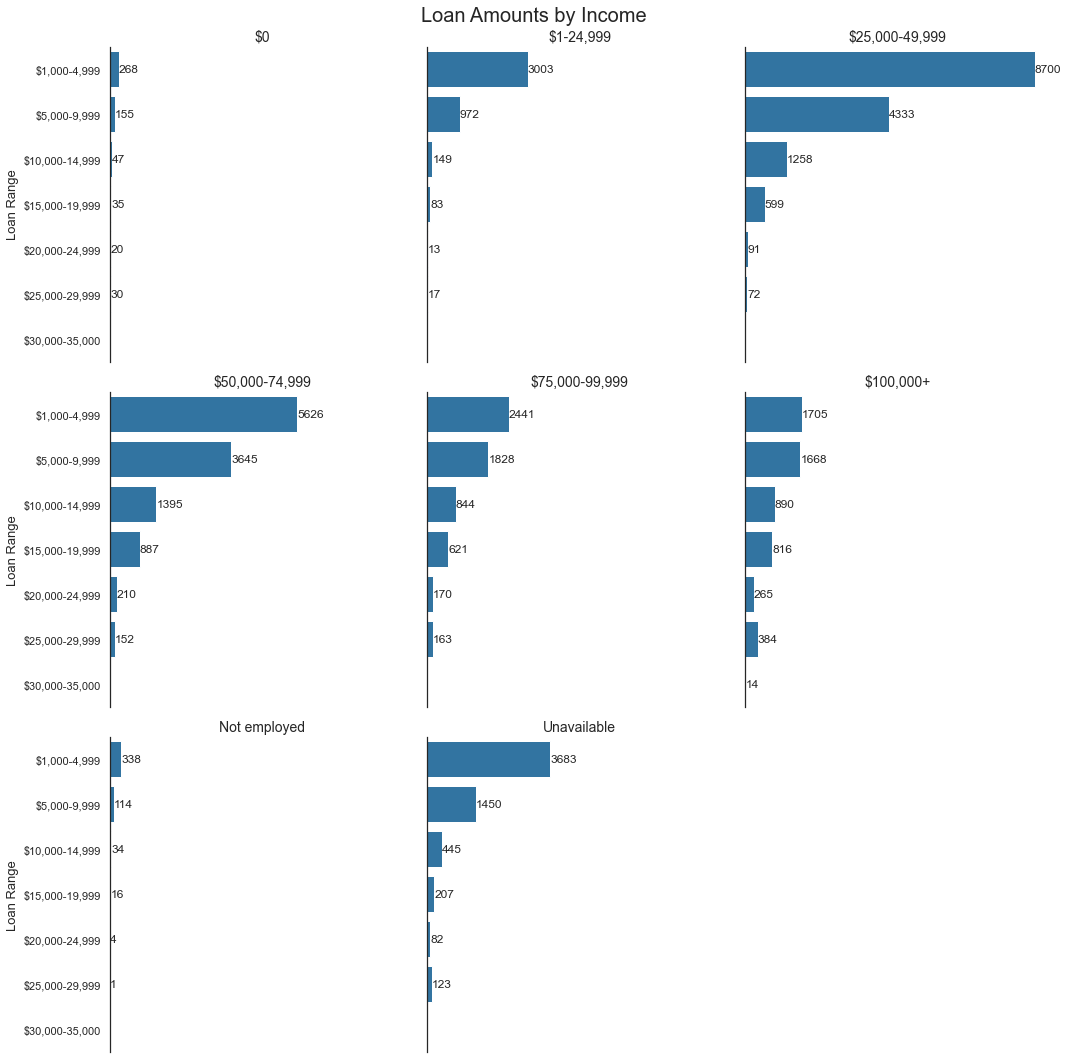

In [40]:
g = sns.catplot(col='IncomeRange', y='LoanRange', color=color, 
                col_wrap=3, kind='count', data=prosperloan_clean)
g.fig.suptitle('Loan Amounts by Income', size=20)
g.set_titles('{col_name}', size=14)
for ax in g.axes.ravel():
    plot_label()
    sns.despine(bottom=True)
    ax.set(xlabel='', xticklabels='', ylabel='Loan Range')
    
plt.tight_layout()

+ Only people earning \\$100k+ request the highest loan amounts ie \\$30k-35k
+ Across all income groups, the number of loans generally decrease with increasing loan amounts

<a id='multi'></a>
## Multivariate Exploration

### How does Income relate to both Loan Status and Delinquent Status?

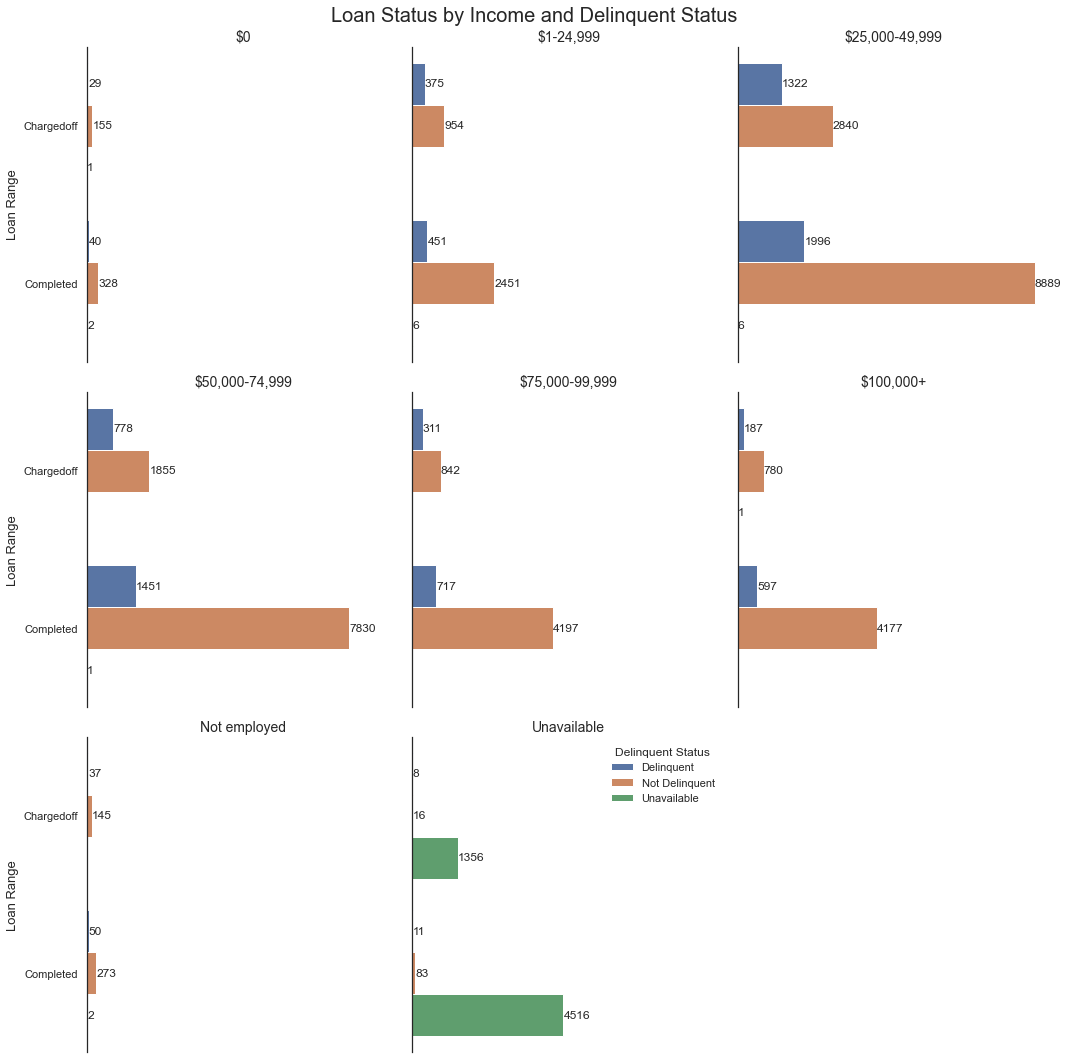

In [41]:
g = sns.catplot(col='IncomeRange', y='LoanStatus', hue='DelinquentStatus', legend=False,
            kind='count', col_wrap=3, data=prosperloan_clean)
g.set_titles('{col_name}', size=14)
g.fig.suptitle('Loan Status by Income and Delinquent Status', size=20)
plt.legend(title='Delinquent Status', title_fontsize='medium', frameon=False, bbox_to_anchor=(1,1))
for ax in g.axes.ravel():
    plot_label()
    sns.despine(bottom=True)
    ax.set(xlabel='', xticklabels='', ylabel='Loan Range')
    
plt.tight_layout()    

Observations made previously can all be seen at a glance:

+ The highest number of lendees are in the \\$25k-29.9k income range
+ Completed loans are more than chargedoff loans
+ Most lendees have no prior delinquencies


### How does Loan Amount relate to both Loan Status and Delinquent Status?

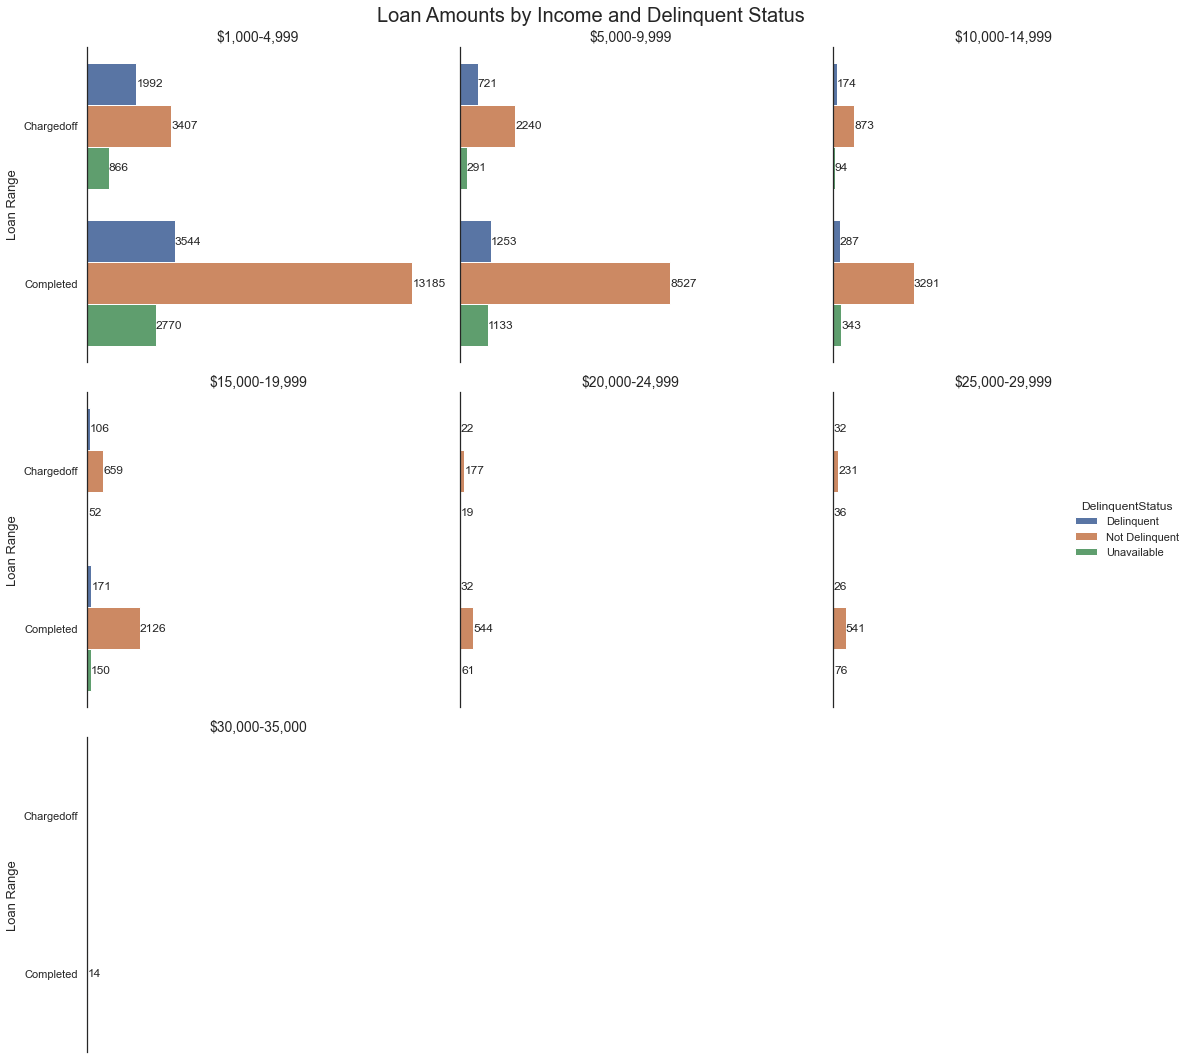

In [42]:
g = sns.catplot(col='LoanRange', y='LoanStatus', hue='DelinquentStatus', legend_out=True,
            kind='count', col_wrap=3, data=prosperloan_clean)
g.set_titles('{col_name}', size=14)
g.fig.suptitle('Loan Amounts by Income and Delinquent Status', size=20)
for ax in g.axes.ravel():
    plot_label()
    sns.despine(bottom=True)
    ax.set(xlabel='', xticklabels='', ylabel='Loan Range')
    
plt.tight_layout()    

Observations made in the bivariate stage can be seen at a glance:

+ Most of the loans are in the \\$1000-4999 range
+ Number of loans decrease as the loan amounts increase

### How does Loan Amount relate to both Income and Loan Status?

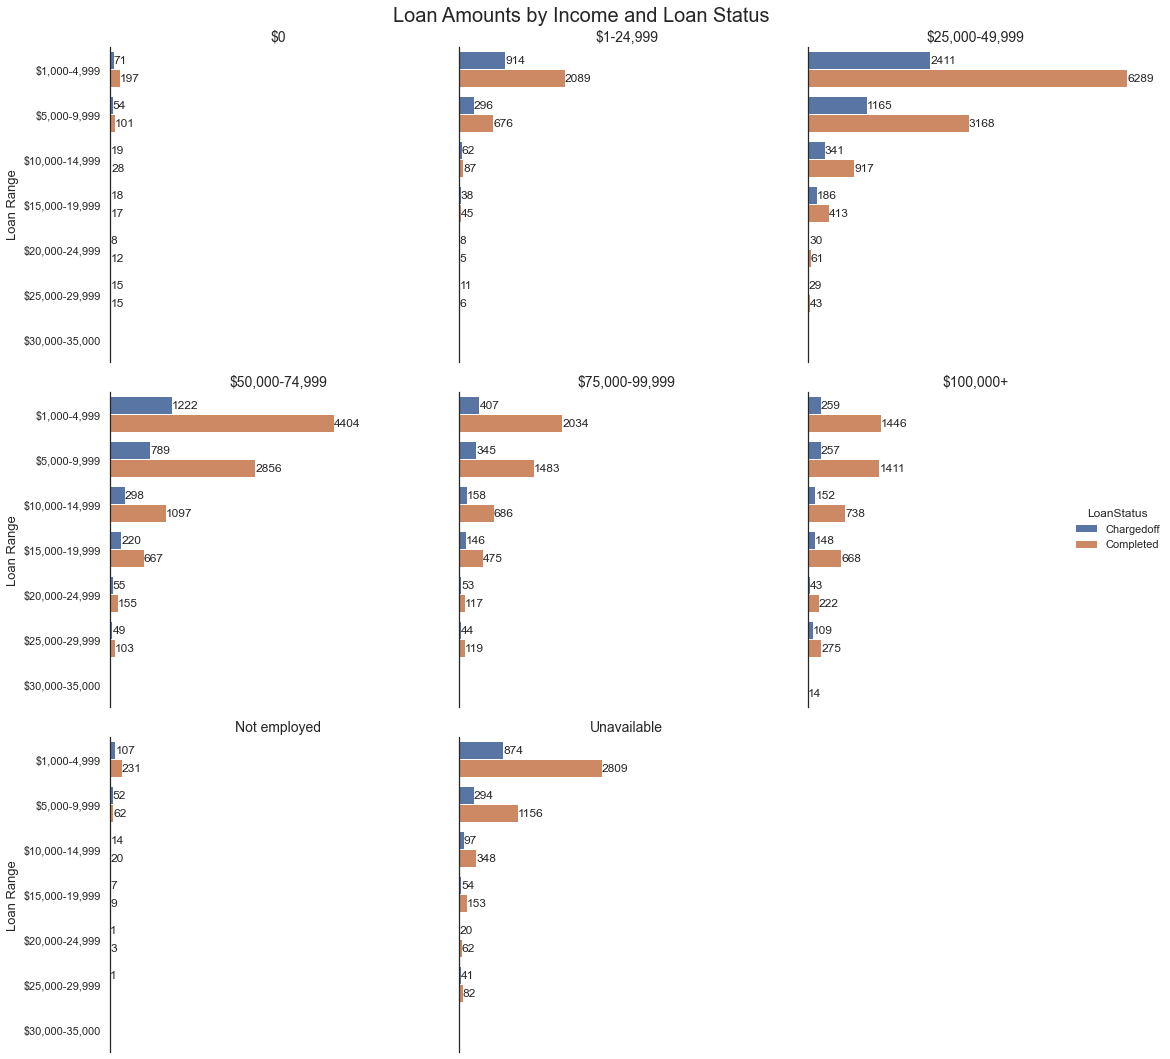

In [43]:
g = sns.catplot(col='IncomeRange', y='LoanRange', hue='LoanStatus', legend_out=True,
            kind='count', col_wrap=3, data=prosperloan_clean)
g.set_titles('{col_name}', size=14)
g.fig.suptitle('Loan Amounts by Income and Loan Status', size=20)
for ax in g.axes.ravel():
    plot_label()
    sns.despine(bottom=True)
    ax.set(xlabel='', xticklabels='', ylabel='Loan Range')
    
plt.tight_layout()    

Previous observations are once more made plain in a single plot:
+ Across all income groups, the most common loan is in the \\$1000-4999
+ The other loan amounts have decreasing clients as the amounts increase.
+ The highest loan range \\$30k-35k is only taken by people with incomes of \\$100k+ 
+ Across most income groups and loan ranges, completed loans far exceed chargedoff loans

<a id='conclusion'></a>
## Conclusions

+ Most of the Prosper clients take 3-year loans
+ Most Prosper loans are fully paid off
+ Most Prosper clients have no prior delinquencies
+ Most Prosper clients take loans in the \\$1000-4999 range
+ The rate of loan repayment increases with increase in income
+ Most Prosper clients are in the income range \\$25k-49.9k
+ 64% of clients with prior delinquencies paid off Prosper loans
+ 1-Year loans have the highest repayment rate
+ Home ownership has no effect on loan completion or past delinquencies. 